In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

# Task 1: Basic Analysis

## Reading the dataset

In [2]:
#Reading dataset

df = pd.read_csv ('dft_traffic_counts_aadf.csv')

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,sequence,ramp,estimation_method,estimation_method_detailed,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,380000,389400,53.401041,-2.302268,2.8,1.74,40.0,0.0,Estimated,Estimated using previous year's AADF on this link,214,91,22425,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,292310,680000,56.000814,-3.728354,1.1,0.68,30.0,0.0,Counted,Manual count,2,23,10119,35,1787,192,99,72,25,391,216,996,12959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,345475,418537,53.660463,-2.826573,3.2,1.99,240.0,0.0,Estimated,Estimated using previous year's AADF on this link,32,62,7559,79,1309,229,48,54,107,148,107,692,9701
489158,489159,27293,2019,5,148,A559,PA,Major,A530,A559 Hall Lane,369000,374920,53.270356,-2.466282,0.5,0.31,30.0,0.0,Estimated,Estimated using previous year's AADF on this link,56,64,13335,47,1756,182,20,18,39,53,33,346,15547


In [3]:
df.describe()

,id,count_point_id,year,region_id,local_authority_id,easting,northing,latitude,longitude,link_length_km,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,4.891590e+05,489159.000000,489159.000000,376392.000000,...,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000,489159.000000
mean,244580.000000,250057.397012,2010.412772,5.928929,98.314374,421932.315153,3.282030e+05,52.841607,-1.701621,2.813195,...,186.831572,2153.871502,361.230984,64.755172,70.810379,53.712543,184.978062,217.199900,952.666685,16803.646886
std,141208.184501,371234.172211,6.031980,3.012450,53.181064,99125.149979,1.851147e+05,1.664812,1.471638,3.837195,...,326.062909,2775.208885,600.438557,108.290034,133.369543,150.275483,652.558431,784.359703,2178.980990,20227.192102
min,1.000000,51.000000,2000.000000,1.000000,1.000000,65412.000000,1.021700e+04,49.912239,-7.510269,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122290.500000,28739.000000,2005.000000,3.000000,63.000000,352970.000000,1.810350e+05,51.514818,-2.706988,0.600000,...,29.000000,582.000000,63.000000,10.000000,5.000000,3.000000,2.000000,2.000000,104.000000,4660.000000
50%,244580.000000,58387.000000,2010.000000,6.000000,91.000000,423460.000000,2.916280e+05,52.514906,-1.648168,1.500000,...,85.000000,1409.000000,182.000000,32.000000,26.000000,12.000000,17.000000,19.000000,325.000000,11509.000000
75%,366869.500000,99316.000000,2016.000000,9.000000,139.000000,505069.000000,4.110000e+05,53.593429,-0.462616,3.300000,...,205.000000,2536.000000,387.000000,72.000000,76.000000,39.000000,80.000000,89.000000,769.000000,20434.000000
max,489159.000000,999999.000000,2020.000000,11.000000,210.000000,655040.000000,2.187789e+06,69.523878,1.754553,66.100000,...,11359.000000,40479.000000,10942.000000,5968.000000,3938.000000,3949.000000,15681.000000,15115.000000,31198.000000,262842.000000


In [4]:
df[df['road_type']=='Major'].isnull().sum()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name           366
end_junction_road_name             357
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                       0
link_length_miles                    0
sequence                             0
ramp                            249694
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

Not many null values in Major road type except for Ramp column

In [5]:
df[df['road_type']=='Minor'].isnull().sum()

id                                   0
count_point_id                       0
year                                 0
region_id                            0
local_authority_id                   0
road_name                            0
road_category                        0
road_type                            0
start_junction_road_name        112767
end_junction_road_name          112767
easting                              0
northing                             0
latitude                             0
longitude                            0
link_length_km                  112767
link_length_miles               112767
sequence                        112767
ramp                            112767
estimation_method                    0
estimation_method_detailed           0
pedal_cycles                         0
two_wheeled_motor_vehicles           0
cars_and_taxis                       0
buses_and_coaches                    0
lgvs                                 0
hgvs_2_rigid_axle        

Lot of null values in Minor road types

In [6]:
print(df[df['road_type']=='Major']['link_length_miles'].sum())
print(df[df['road_type']=='Minor']['link_length_miles'].sum())

print(df[df['road_type']=='Major']['link_length_km'].sum())
print(df[df['road_type']=='Minor']['link_length_km'].sum())

657837.85
0.0
1058863.91
0.0


Minor road types have no miles at all

In [7]:
#Printing columns with null values

df[['start_junction_road_name','end_junction_road_name','link_length_km','link_length_miles','sequence','ramp']]

,start_junction_road_name,end_junction_road_name,link_length_km,link_length_miles,sequence,ramp
0,LA Boundary,M56,2.8,1.74,40.0,0.0
1,M9,M9 slip,1.1,0.68,30.0,0.0
2,2,2,2.1,1.30,40.0,0.0
3,LA Boundary,29A,2.8,1.74,3360.0,0.0
4,A62 Manchester St roundabout,A627 King St,0.5,0.31,130.0,0.0
...,...,...,...,...,...,...
489154,A1199,A503,2.2,1.37,20.0,0.0
489155,A13,A1321,1.9,1.18,10.0,0.0
489156,LA Boundary,A579,1.9,1.18,60.0,0.0
489157,A581,A565,3.2,1.99,240.0,0.0


In [8]:
#Dropping ramp column

df.drop('ramp', axis=1, inplace=True)

with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
    display(df)

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,sequence,estimation_method,estimation_method_detailed,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,380000,389400,53.401041,-2.302268,2.8,1.74,40.0,Estimated,Estimated using previous year's AADF on this link,214,91,22425,391,2768,158,54,24,7,2,8,253,25927
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,292310,680000,56.000814,-3.728354,1.1,0.68,30.0,Counted,Manual count,2,23,10119,35,1787,192,99,72,25,391,216,996,12959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,345475,418537,53.660463,-2.826573,3.2,1.99,240.0,Estimated,Estimated using previous year's AADF on this link,32,62,7559,79,1309,229,48,54,107,148,107,692,9701
489158,489159,27293,2019,5,148,A559,PA,Major,A530,A559 Hall Lane,369000,374920,53.270356,-2.466282,0.5,0.31,30.0,Estimated,Estimated using previous year's AADF on this link,56,64,13335,47,1756,182,20,18,39,53,33,346,15547


In [9]:
#Replacing region id with region name found using googling road names

df['region_name'] = df['region_id'].replace({1: 'South West', 2: 'East Midlands', 3: 'Scotland', 4: 'Wales', 5: 'North West', 6: 'London', 7: 'East of England', 8: 'Yorkshire and The Humber', 9: 'South East', 10: 'West Midlands', 11: 'North East'})

In [10]:
#Dropped null values

df.dropna(inplace = True)

with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df)

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,easting,northing,latitude,longitude,link_length_km,link_length_miles,sequence,estimation_method,estimation_method_detailed,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,region_name
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,380000,389400,53.401041,-2.302268,2.8,1.74,40.0,Estimated,Estimated using previous year's AADF on this link,214,91,22425,391,2768,158,54,24,7,2,8,253,25927,North West
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,292310,680000,56.000814,-3.728354,1.1,0.68,30.0,Counted,Manual count,2,23,10119,35,1787,192,99,72,25,391,216,996,12959,Scotland
2,3,8024,2019,9,80,M20,TM,Major,2,2,561000,159600,51.312739,0.308688,2.1,1.30,40.0,Estimated,Estimated using previous year's AADF on this link,0,455,38163,149,9592,1167,192,269,403,3799,1788,7619,55977,South East
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,325000,183640,51.546649,-3.082974,2.8,1.74,3360.0,Estimated,Estimated using previous year's AADF on this link,0,184,37918,276,5603,1052,140,230,106,508,1186,3222,47203,Wales
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,392080,404710,53.538976,-2.120975,0.5,0.31,130.0,Counted,Manual count,0,159,46216,186,7242,629,152,152,37,120,196,1285,55089,North West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,531960,185000,51.548469,-0.098260,2.2,1.37,20.0,Estimated,Estimated using previous year's AADF on this link,889,498,11526,683,2765,127,15,6,3,1,4,156,15628,London
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,573000,188760,51.571167,0.494938,1.9,1.18,10.0,Estimated,Estimated using previous year's AADF on this link,29,83,14594,21,3158,346,81,180,36,177,127,948,18804,East of England
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,360992,396246,53.461506,-2.588989,1.9,1.18,60.0,Estimated,Estimated using previous year's AADF on this link,71,58,5611,81,643,67,20,30,1,14,9,141,6534,North West
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,345475,418537,53.660463,-2.826573,3.2,1.99,240.0,Estimated,Estimated using previous year's AADF on this link,32,62,7559,79,1309,229,48,54,107,148,107,692,9701,North West


In [11]:
df.isnull().all().sum()

0

In [12]:
df['road_type'].values.all()

'Major'

In [13]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(df.describe())

,id,count_point_id,year,region_id,local_authority_id,easting,northing,latitude,longitude,link_length_km,link_length_miles,sequence,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
count,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,3.760000e+05,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000,376000.000000
mean,252616.923298,47797.851314,2010.045184,5.855191,96.851758,418864.703918,3.357268e+05,52.909244,-1.749400,2.813301,1.747813,350.824862,123.805540,211.448862,16456.011263,229.027399,2681.670718,457.311995,82.125383,90.202947,68.813471,239.014755,280.809024,1218.270859,20796.421452
std,140031.411675,27263.902192,6.050636,2.986741,53.356069,99486.461462,1.899607e+05,1.708120,1.480318,3.836230,2.383919,907.486472,423.427981,390.078405,16387.012674,356.691091,2953.822166,653.246823,117.766576,146.189823,168.348564,734.820712,882.988738,2418.686399,21382.686613
min,1.000000,51.000000,2000.000000,1.000000,1.000000,74900.000000,1.021700e+04,49.912239,-7.442681,0.070000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,134863.750000,26355.000000,2005.000000,3.000000,61.000000,350000.000000,1.814850e+05,51.518833,-2.755048,0.600000,0.370000,30.000000,5.000000,58.000000,6929.000000,54.000000,1091.000000,134.000000,23.000000,15.000000,7.000000,9.000000,10.000000,237.000000,8729.750000
50%,257727.500000,47344.500000,2010.000000,6.000000,89.000000,419950.000000,2.975000e+05,52.570431,-1.706390,1.500000,0.930000,75.000000,26.000000,110.000000,11941.000000,115.000000,1813.000000,251.000000,46.000000,41.000000,20.000000,33.000000,38.000000,466.000000,14776.000000
75%,375658.500000,74603.000000,2015.000000,9.000000,138.000000,503600.000000,4.200000e+05,53.674551,-0.487927,3.300000,2.050000,220.000000,86.000000,208.000000,19436.000000,254.000000,3018.000000,481.000000,90.000000,100.000000,54.000000,124.000000,138.000000,1005.000000,24080.000000
max,489159.000000,99967.000000,2020.000000,11.000000,210.000000,655040.000000,2.187789e+06,69.523878,1.754553,66.100000,41.070000,6575.000000,18629.000000,9815.000000,207133.000000,11359.000000,40479.000000,10942.000000,5968.000000,3938.000000,3949.000000,15681.000000,15115.000000,31198.000000,262842.000000


Calculating annual mileage using the formula given from: 

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/524848/annual-methodology-note.pdf

In [14]:
data = df.copy()

data['annual_mileage_region'] = (data['link_length_miles'] * data['all_motor_vehicles'])/1000000000 *365

data

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,region_name,annual_mileage_region
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,158,54,24,7,2,8,253,25927,North West,0.016466
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,192,99,72,25,391,216,996,12959,Scotland,0.003216
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,1167,192,269,403,3799,1788,7619,55977,South East,0.026561
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,1052,140,230,106,508,1186,3222,47203,Wales,0.029979
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,629,152,152,37,120,196,1285,55089,North West,0.006233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,...,127,15,6,3,1,4,156,15628,London,0.007815
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,...,346,81,180,36,177,127,948,18804,East of England,0.008099
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,...,67,20,30,1,14,9,141,6534,North West,0.002814
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,...,229,48,54,107,148,107,692,9701,North West,0.007046


## Finding annual mileage per region

In [15]:
# Grouping by year and region and summing 

datax = data.groupby(['year','region_id']).sum()

datax.drop(['id','count_point_id','local_authority_id','easting','northing','latitude','longitude'],axis=1,inplace=True)

datax = datax.reset_index(level=0)
datax = datax.reset_index(level=0)

datax['region_name'] = datax['region_id'].replace({1: 'South West', 2: 'East Midlands', 3: 'Scotland', 4: 'Wales', 5: 'North West', 6: 'London', 7: 'East of England', 8: 'Yorkshire and The Humber', 9: 'South East', 10: 'West Midlands', 11: 'North East'})

# Removing 2020 values since they are incomplete

datax = datax[datax['year']!=2020]
 
with pd.option_context('display.max_rows', 10, 'display.max_columns', None): 
    display(datax)

,region_id,year,link_length_km,link_length_miles,sequence,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,annual_mileage_region,region_name
0,1,2000,5243.00,3257.41,606089.0,100784,291388,20600734,260607,2600758,646268,118117,78722,133494,287773,186785,1451159,25204646,17.187806,South West
1,2,2000,4029.16,2503.36,519027.0,88768,186004,19687547,216446,2624940,788756,112392,105232,215739,508511,346716,2077346,24792283,15.489089,East Midlands
2,3,2000,10658.67,6622.49,422692.0,57715,134022,21170654,383717,2770835,712763,134554,99235,167786,359857,270064,1744259,26203487,16.037064,Scotland
3,4,2000,4282.99,2661.13,369606.0,25099,99311,12072492,142642,1511931,383711,81236,60545,69526,180194,111564,886776,14713152,9.633981,Wales
4,5,2000,4617.41,2868.30,1027172.0,160885,320714,39149071,620385,4959728,1287721,187742,192994,302342,728483,437394,3136676,48186574,21.537216,North West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,7,2019,4227.80,2626.65,632657.0,147635,224506,28261858,169098,5365118,625178,131501,191835,103056,553561,874945,2480099,36500686,24.878636,East of England
216,8,2019,3830.10,2379.48,545628.0,124591,156033,24893126,194899,4572884,607413,137423,156689,100923,463500,951003,2416963,32233916,18.737197,Yorkshire and The Humber
217,9,2019,5963.60,3704.80,875062.0,246331,461674,48269814,307181,8776716,929975,185700,288896,134780,590878,789115,2919309,60734698,37.885781,South East
218,10,2019,4051.10,2516.92,724178.0,85858,178555,30440124,201953,5169970,770885,160453,177928,99718,407738,1008536,2625208,38615886,20.925130,West Midlands


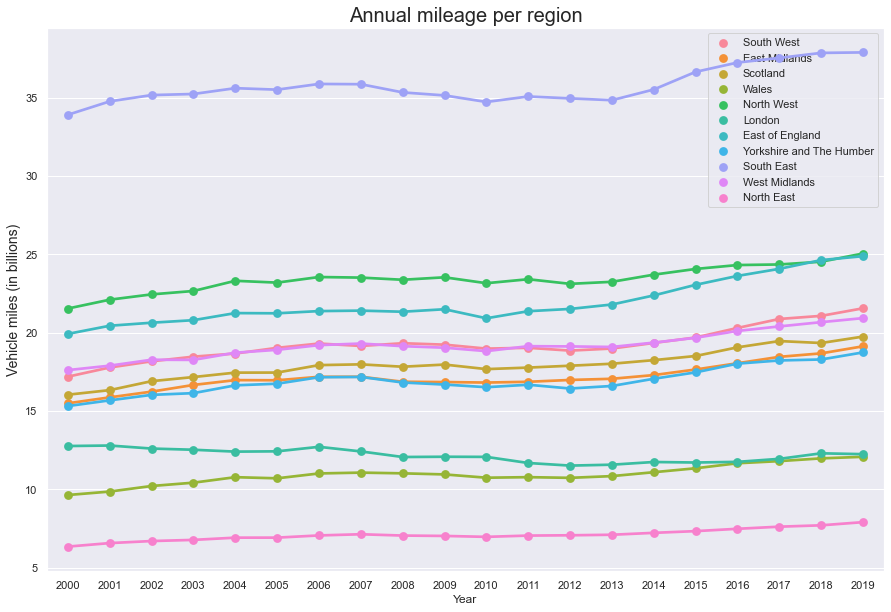

In [16]:
#Printing the data

plt.figure(figsize=(15,10))
ax = sns.pointplot(x='year', y='annual_mileage_region', data=datax,hue='region_name')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Vehicle miles (in billions)', fontsize=14)
plt.title('Annual mileage per region', fontsize=20)
plt.show()

## Finding annual mileage per vehicle type 

In [17]:
#Calculating annual miles

data2 = df.copy()

data2['cycle_miles'] = data2['link_length_miles'] * data2['pedal_cycles']/1000000000 * 365
data2['two_wheeler_miles'] = data2['link_length_miles'] * data2['two_wheeled_motor_vehicles']/1000000000 * 365
data2['cars_and_taxis_miles'] = data2['link_length_miles'] * data2['cars_and_taxis']/1000000000 * 365
data2['buses_and_coaches_miles'] = data2['link_length_miles'] * data2['buses_and_coaches']/1000000000 * 365
data2['lgvs_miles'] = data2['link_length_miles'] * data2['lgvs']/1000000000 * 365
data2['all_hgvs_miles'] = data2['link_length_miles'] * data2['all_hgvs']/1000000000 * 365

data2

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,region_name,cycle_miles,two_wheeler_miles,cars_and_taxis_miles,buses_and_coaches_miles,lgvs_miles,all_hgvs_miles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,8,253,25927,North West,1.359114e-04,0.000058,0.014242,0.000248,0.001758,0.000161
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,216,996,12959,Scotland,4.964000e-07,0.000006,0.002512,0.000009,0.000444,0.000247
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,1788,7619,55977,South East,0.000000e+00,0.000216,0.018108,0.000071,0.004551,0.003615
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,1186,3222,47203,Wales,0.000000e+00,0.000117,0.024082,0.000175,0.003558,0.002046
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,196,1285,55089,North West,0.000000e+00,0.000018,0.005229,0.000021,0.000819,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,...,4,156,15628,London,4.445444e-04,0.000249,0.005764,0.000342,0.001383,0.000078
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,...,127,948,18804,East of England,1.249030e-05,0.000036,0.006286,0.000009,0.001360,0.000408
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,...,9,141,6534,North West,3.057970e-05,0.000025,0.002417,0.000035,0.000277,0.000061
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,...,107,692,9701,North West,2.324320e-05,0.000045,0.005490,0.000057,0.000951,0.000503


In [18]:
#Grouping by year

data3 = data2.groupby(['year']).sum()

data3.drop(['region_id','id','count_point_id','local_authority_id','easting','northing','latitude','longitude'],axis=1,inplace=True)

data3 = data3.reset_index(level=0)

data3 = data3.drop(['link_length_km','sequence','hgvs_2_rigid_axle','hgvs_3_rigid_axle','hgvs_4_or_more_rigid_axle','hgvs_3_or_4_articulated_axle','hgvs_5_articulated_axle','hgvs_6_articulated_axle','all_motor_vehicles'],axis=1)

data3 = data3.drop(['link_length_miles','pedal_cycles','two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs'],axis=1)

data3

,year,cycle_miles,two_wheeler_miles,cars_and_taxis_miles,buses_and_coaches_miles,lgvs_miles,all_hgvs_miles
0,2000,0.451893,1.556737,147.474615,1.659541,19.797529,15.242155
1,2001,0.447774,1.626903,151.167561,1.673906,20.414613,15.165731
2,2002,0.425197,1.647392,154.036119,1.661837,20.704912,15.283223
3,2003,0.471567,1.816296,154.605951,1.628153,21.725882,15.303310
4,2004,0.426490,1.664830,156.987293,1.550450,22.598078,15.873550
5,2005,0.424663,1.627027,156.899415,1.563215,23.255623,15.700202
6,2006,0.521877,1.632427,158.748475,1.674038,24.469327,15.805337
7,2007,0.435742,1.631885,157.350802,1.594328,25.617944,15.965417
8,2008,0.508009,1.602110,156.142039,1.550412,25.278056,15.556364
9,2009,0.535082,1.613486,157.263347,1.552579,25.126289,14.414288


In [19]:
# Categorising each vehicle type so that i can make it into a plot easily

data4 = data3.melt('year', var_name='vehicle_type', value_name='link_length_miles')

data4 = data4[data4['year']!=2020]

data4

,year,vehicle_type,link_length_miles
0,2000,cycle_miles,0.451893
1,2001,cycle_miles,0.447774
2,2002,cycle_miles,0.425197
3,2003,cycle_miles,0.471567
4,2004,cycle_miles,0.426490
...,...,...,...
120,2015,all_hgvs_miles,15.126889
121,2016,all_hgvs_miles,15.333798
122,2017,all_hgvs_miles,15.608414
123,2018,all_hgvs_miles,15.741875


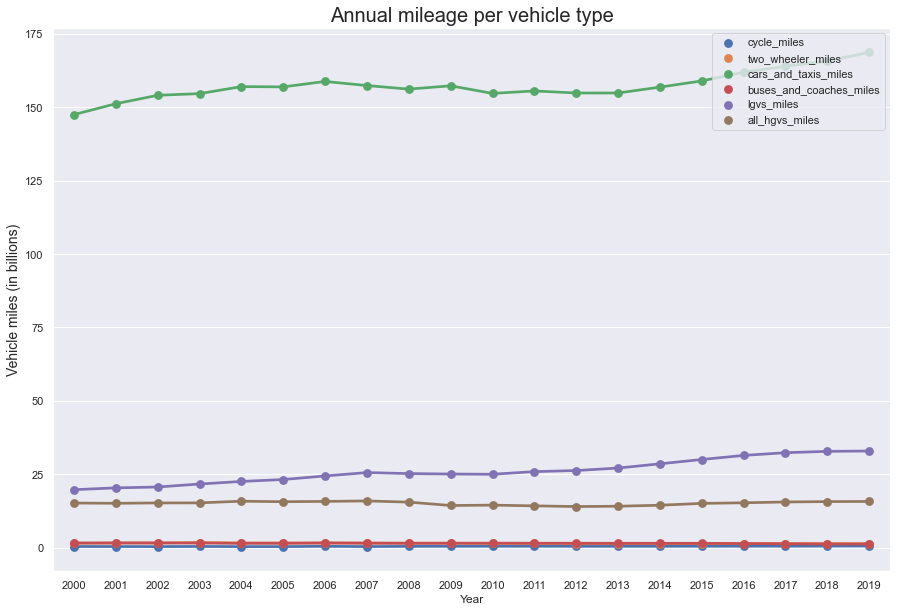

In [20]:
#Printing the data

plt.figure(figsize=(15,10))
ax = sns.pointplot(x='year', y='link_length_miles', data=data4, hue='vehicle_type')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Vehicle miles (in billions)', fontsize=14)
plt.title('Annual mileage per vehicle type', fontsize=20)
plt.show()

## Annual mileage for all vehicle types

In [47]:
data5 = df.copy()

data5['total_miles'] = data5['link_length_miles'] * data5['all_motor_vehicles']/1000000000 * 365

data5 = data5.groupby(['year']).sum()

data5.drop(['region_id','id','count_point_id','local_authority_id','easting','northing','latitude','longitude'],axis=1,inplace=True)

data5 = data5.reset_index(level=0)

data5 = data5.drop(['link_length_km','sequence','hgvs_2_rigid_axle','hgvs_3_rigid_axle','hgvs_4_or_more_rigid_axle','hgvs_3_or_4_articulated_axle','hgvs_5_articulated_axle','hgvs_6_articulated_axle'],axis=1)

data5 = data5.drop(['link_length_miles','pedal_cycles','two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs'],axis=1)

data5 = data5[data5['year']!=2020]

data5

,year,all_motor_vehicles,total_miles
0,2000,357686872,185.730470
1,2001,363174945,190.048607
2,2002,367339011,193.333442
3,2003,368704229,195.079552
4,2004,374819895,198.674151
5,2005,374279130,199.045483
6,2006,380287290,202.329606
7,2007,378677077,202.160377
8,2008,373049629,200.120867
9,2009,373723262,199.969988


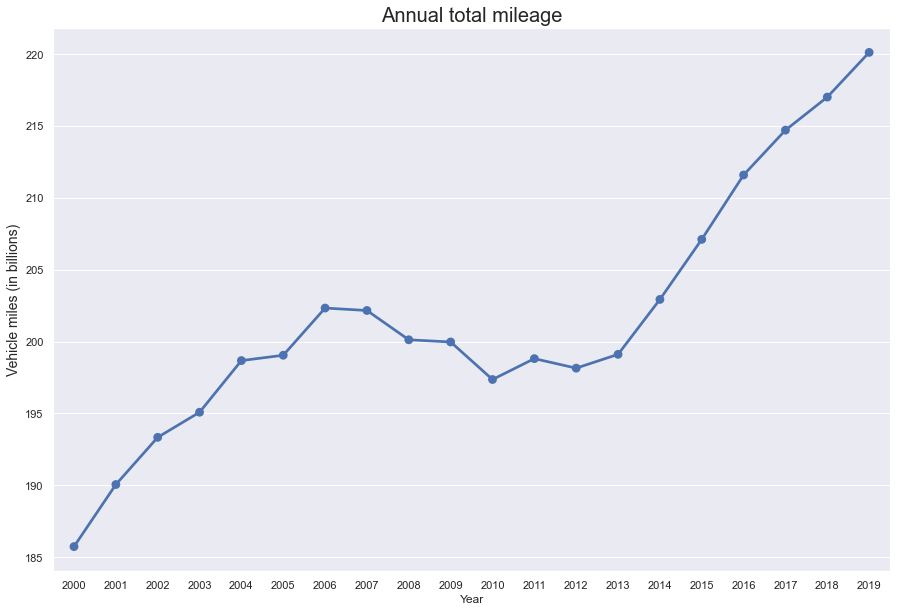

In [49]:
#Printing the data

plt.figure(figsize=(15,10))
ax = sns.pointplot(x='year', y='total_miles', data=data5)
plt.xlabel('Year')
plt.ylabel('Vehicle miles (in billions)', fontsize=14)
plt.title('Annual total mileage', fontsize=20)
plt.show()

# Task 2: Regression

I have decided to use Autoregressive Integrated Moving Average (ARIMA) as my regression model since the data is split across stationary time periods, so time series forecasting model is approppriate to extrapolate the results of the next 30 years. ARIMA is one of the most robust time series forecasting model available.

A potential limitation of ARIMA is that the results do not account for external factors that could affect the results in the future. It is forecasting solely based on the current annual miles data.

In [22]:
#Calculating annual miles

train_df = df.copy()

train_df['miles'] = train_df['all_motor_vehicles']*train_df['link_length_miles']/1000000000 * 365

train_df

,id,count_point_id,year,region_id,local_authority_id,road_name,road_category,road_type,start_junction_road_name,end_junction_road_name,...,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,region_name,miles
0,1,27294,2019,5,85,A560,PA,Major,LA Boundary,M56,...,158,54,24,7,2,8,253,25927,North West,0.016466
1,2,1153,2019,3,30,A905,PA,Major,M9,M9 slip,...,192,99,72,25,391,216,996,12959,Scotland,0.003216
2,3,8024,2019,9,80,M20,TM,Major,2,2,...,1167,192,269,403,3799,1788,7619,55977,South East,0.026561
3,4,20505,2019,4,6,A48(M),TM,Major,LA Boundary,29A,...,1052,140,230,106,508,1186,3222,47203,Wales,0.029979
4,5,46628,2019,5,162,A62,PA,Major,A62 Manchester St roundabout,A627 King St,...,629,152,152,37,120,196,1285,55089,North West,0.006233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489154,489155,7538,2019,6,96,A1201,PA,Major,A1199,A503,...,127,15,6,3,1,4,156,15628,London,0.007815
489155,489156,6670,2019,7,123,A132,PA,Major,A13,A1321,...,346,81,180,36,177,127,948,18804,East of England,0.008099
489156,489157,7287,2019,5,75,A572,PA,Major,LA Boundary,A579,...,67,20,30,1,14,9,141,6534,North West,0.002814
489157,489158,6584,2019,5,76,A59,PA,Major,A581,A565,...,229,48,54,107,148,107,692,9701,North West,0.007046


In [23]:
#Grouping by year

train_df = train_df.groupby(['year']).sum()

train_df.drop(['region_id','id','count_point_id','local_authority_id','easting','northing','latitude','longitude'],axis=1,inplace=True)

train_df = train_df.reset_index(level=0)

train_df

,year,link_length_km,link_length_miles,sequence,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles,miles
0,2000,50022.38,31077.21,6878398.0,1635238,3974565,289083949,4363169,37907200,9500515,1430046,1294026,2080264,4939028,3114110,22357989,357686872,185.730470
1,2001,50106.98,31129.75,6912893.0,1679097,4186587,293586723,4423144,38792036,9282283,1511059,1304752,1914847,4754096,3419418,22186455,363174945,190.048607
2,2002,50128.98,31143.33,5903691.0,1648622,4125697,297273150,4447216,39254647,9267958,1473697,1350452,1812932,4683524,3649738,22238301,367339011,193.333442
3,2003,50107.94,31130.27,5891843.0,1844530,4616260,295976527,4390199,41456740,9262959,1464811,1409512,1728337,4583677,3815208,22264504,368704229,195.079552
4,2004,50168.94,31168.25,5974095.0,1738083,4241711,300307110,4148939,42901959,9632116,1516078,1541282,1701886,4708517,4120297,23220176,374819895,198.674151
5,2005,50223.53,31202.25,6245383.0,1866280,4157487,298724401,4175692,44209209,9517293,1489996,1575736,1537521,4653435,4238360,23012341,374279130,199.045483
6,2006,50307.70,31254.58,6337527.0,2333365,4290218,302162304,4368526,46425837,9354225,1487912,1619910,1441233,4734839,4402289,23040407,380287290,202.329606
7,2007,50273.21,31233.09,6256723.0,1953994,4223215,298547314,4257457,48631351,9081378,1489231,1701986,1332362,4788993,4623790,23017739,378677077,202.160377
8,2008,50218.91,31199.31,6250732.0,2144473,4040170,294576102,4168389,47743296,8840596,1548106,1698926,1207443,4689221,4540336,22524628,373049629,200.120867
9,2009,50299.90,31249.59,6245389.0,2242989,3938800,298223086,4193648,46468496,8248137,1436131,1510485,1079195,4368295,4256989,20899233,373723262,199.969988


In [24]:
#Converting year to datetime

train_df['year'] =  pd.to_datetime(train_df['year'],format='%Y')
train_df.index = train_df.year

#Deleting all other columns except miles

train_df= train_df[['miles']]

train_df = train_df[:-1]

train_df

,miles
year,
2000-01-01,185.730470
2001-01-01,190.048607
2002-01-01,193.333442
2003-01-01,195.079552
2004-01-01,198.674151
2005-01-01,199.045483
2006-01-01,202.329606
2007-01-01,202.160377
2008-01-01,200.120867


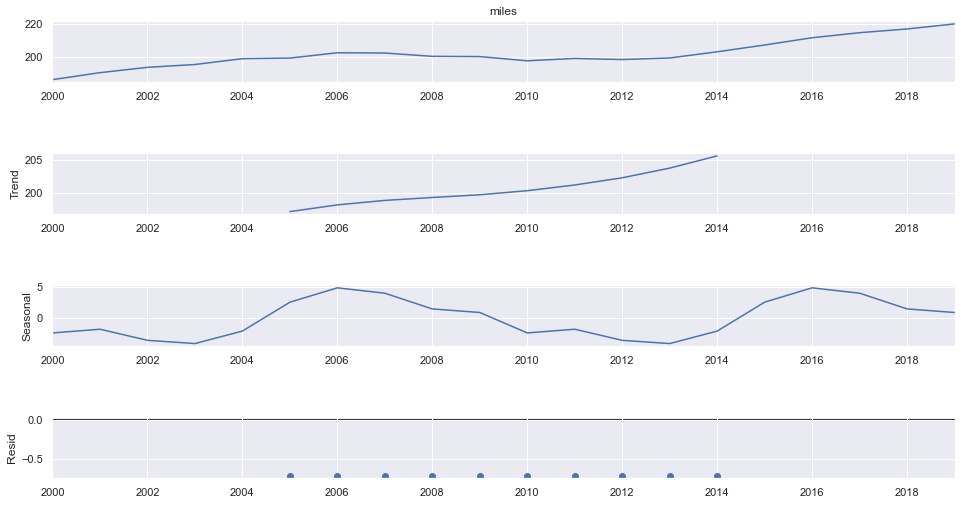

In [25]:
#Trends

res = sm.tsa.seasonal_decompose(train_df.miles,period=10)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [26]:
#Training the model

model = ARIMA(train_df, order=(2,1,0), freq=train_df.index.inferred_freq)
result = model.fit(disp=-1)

C:\Users\anand\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


## Annual mileage forecast

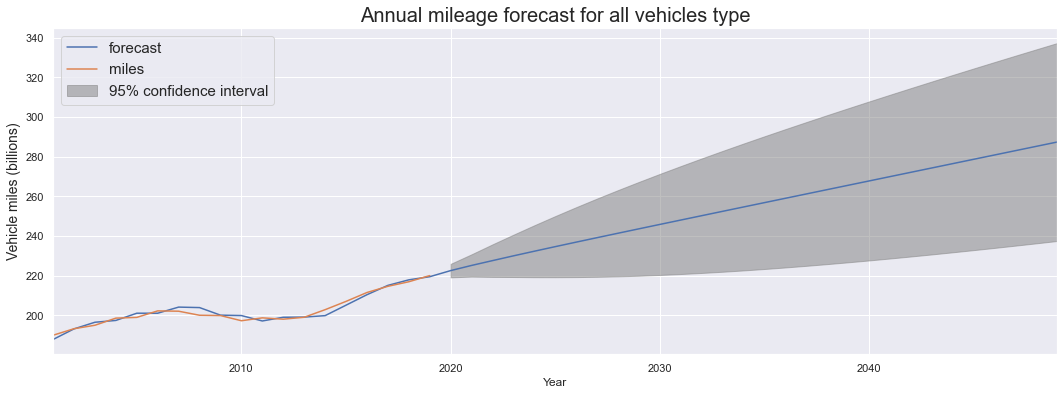

In [27]:
#Printing the forecast

fig = result.plot_predict(1,49)
fig.set_figheight(6)
fig.set_figwidth(18)
plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Annual mileage forecast for all vehicles type', fontsize=20)
plt.legend(loc='upper left', prop={'size':15})
plt.show()


In [28]:
#Printing the forecast values

predict = result.forecast(steps=30)
predict = predict[0]
predict

array([222.63125026, 225.23589124, 227.66360467, 230.06802553,
       232.40420505, 234.71107769, 236.9852924 , 239.23922304,
       241.4755731 , 243.69945025, 245.91337892, 248.11990664,
       250.32069785, 252.51714955, 254.71027101, 256.9008584 ,
       259.08950786, 261.27667966, 263.46272278, 265.64790468,
       267.83242904, 270.01645154, 272.20009092, 274.38343788,
       276.56656161, 278.74951495, 280.93233822, 283.11506221,
       285.29771041, 287.48030077])

The ARIMA model predicts the total annual mileage for all vehicles to increase to about 287 billion miles by the year 2050.

# Task 3 : Research

The percentage of estimated electric vehicle from year 2015 to 2050 is shown in page 42 of this:
    
https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/873929/road-traffic-forecasts-2018-document.pdf
    
    

In [29]:
#Reading electric % dataset

el = pd.read_csv ('electric_percent.csv')

el

,year,electic_percent
0,2015,0.400
1,2016,0.374
2,2017,0.592
3,2018,0.997
4,2019,1.196
5,2020,1.591
6,2021,2.182
7,2022,3.558
8,2023,4.546
9,2024,6.983


97% of all vehicles are predicted to be electric by the year 2050.

I calculate total electric vehicle mileage by multiplying annual miles and percentage of electric miles

In [30]:
#Calculating electric miles forecast

total_mileage = np.concatenate((train_df.values[15:].ravel(), predict))
years = np.arange(2015,2050)

elec = total_mileage * el['electic_percent'].values / 100
elec = pd.DataFrame(data = {'year': years, 'total_mileage': total_mileage, 'electric_mileage': elec})

elec

,year,total_mileage,electric_mileage
0,2015,207.109466,0.828438
1,2016,211.589366,0.791344
2,2017,214.709258,1.271079
3,2018,217.009917,2.163589
4,2019,220.119100,2.632624
5,2020,222.631250,3.542063
6,2021,225.235891,4.914647
7,2022,227.663605,8.100271
8,2023,230.068026,10.458892
9,2024,232.404205,16.228786


## Forecast of electric miles driven per year

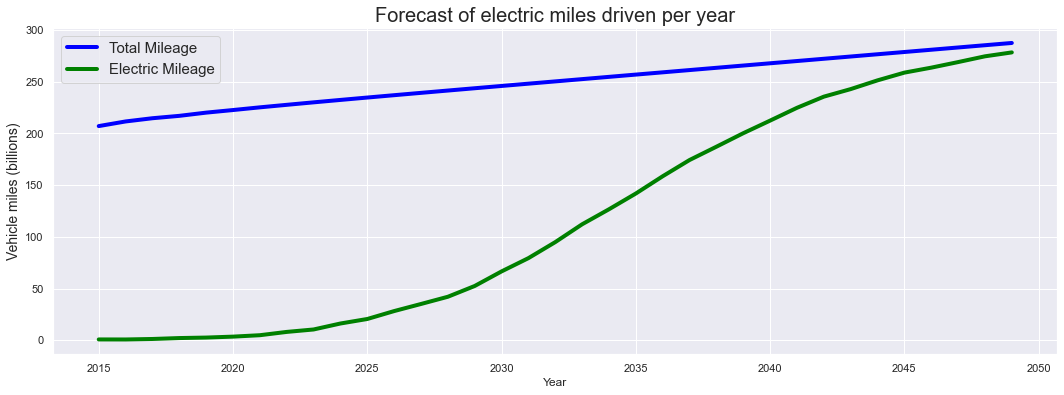

In [31]:
#Printing the forecast data

plt.figure(figsize=(18,6))

plt.plot(elec['year'],elec['total_mileage'], color='blue', linewidth=4.0, label='Total Mileage')
plt.plot(elec['year'],elec['electric_mileage'], color='green', linewidth=4.0, label='Electric Mileage')

plt.xlabel('Year')
plt.ylabel('Vehicle miles (billions)', fontsize=14)
plt.title('Forecast of electric miles driven per year', fontsize=20)

plt.legend(loc='upper left', prop={'size':15})
plt.show()

The average energy consumption of electric vehicles is 314 Wh/mi which can be seen here:
    
https://ev-database.uk/cheatsheet/energy-consumption-electric-car

In [32]:
# Mileage is in billions so we multiple 10^9 to make it to miles and then divide by 10^9 to make it TWhr.

consum = elec['electric_mileage'] * 314 / 10**3

consum

0      0.260129
1      0.248482
2      0.399119
3      0.679367
4      0.826644
5      1.112208
6      1.543199
7      2.543485
8      3.284092
9      5.095839
10     6.465638
11     8.870075
12    11.024024
13    13.216006
14    16.488880
15    20.914171
16    24.944333
17    29.808529
18    35.219203
19    39.778368
20    44.563605
21    49.802543
22    54.732751
23    58.772779
24    62.871214
25    66.700061
26    70.581107
27    73.969019
28    76.261337
29    78.918445
30    81.263891
31    82.773556
32    84.463891
33    86.215142
34    87.401877
Name: electric_mileage, dtype: float64

## Estimate of TWh/year on electricity needed for electric vehicles

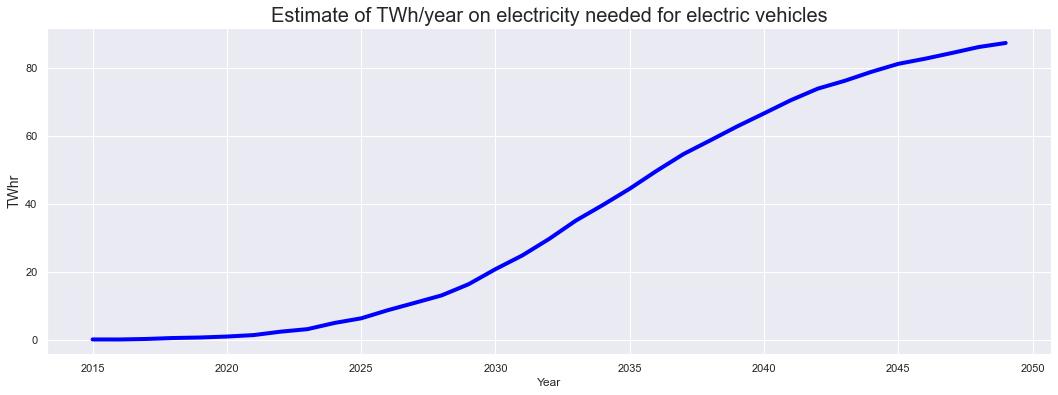

In [33]:
plt.figure(figsize=(18,6))
plt.plot(years, consum.values, linewidth=4.0, color='blue')

plt.xlabel('Year')
plt.ylabel('TWhr', fontsize=14)
plt.title('Estimate of TWh/year on electricity needed for electric vehicles', fontsize=20)

plt.show()

Energy required for electric vehicles by year 2050 is estimated to be 87.5 TWhr

## Extra energy required 

From https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/904805/DUKES_2020_Chapter_5.pdf
    
we can see that UK's energy supply is 330 TWhr and UK's energy demand is also 330TWhr for the year 2020. We can see that UK matches supply exactly with demand. So when the demand for energy for electric vehicles increases, the supply should also increase exactly the same.

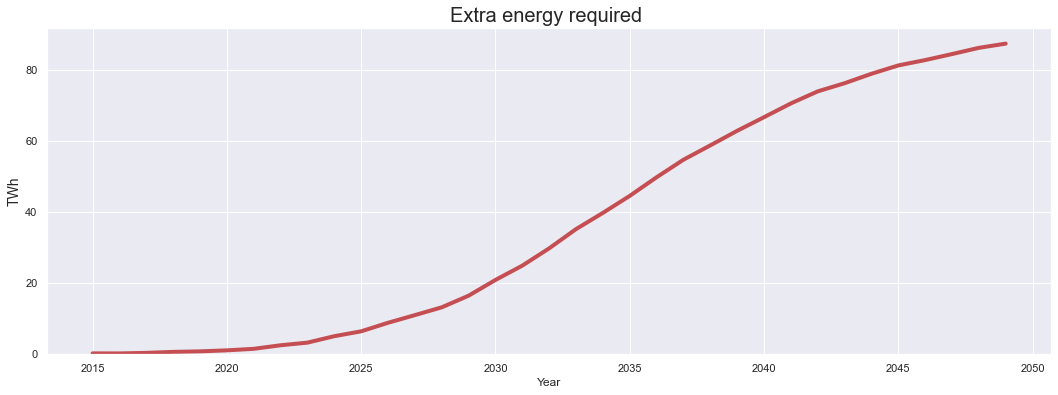

In [34]:
#Printing the forecast data

plt.figure(figsize=(18,6))
plt.plot(years, consum.values, linewidth=4.0, color='r')

plt.xlabel('Year')
plt.ylabel('TWh', fontsize=14)
plt.title('Extra energy required ', fontsize=20)
plt.ylim(0)

plt.show()

# Task 4 : Reccomendation

From the BEIS Electricity Generation Costs 2020 Section 4 (page 27- 35), 

https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/911817/electricity-generation-cost-report-2020.pdf

we obtain the £/MWh for different energy sources from 2025 to 2040.

In [35]:
#Reading the dataset

level = pd.read_csv('levelised_estimated_cost.csv')

level

,year,source,cost
0,2025,CCGT H Class,85
1,2025,Offshore Wind,57
2,2025,Onshore Wind,46
3,2025,Large-Scale Solar,44
4,2025,CCGT + CCS Post Combustion,85
5,2030,CCGT H Class,99
6,2030,Offshore Wind,47
7,2030,Onshore Wind,45
8,2030,Large-Scale Solar,39
9,2030,CCGT + CCS Post Combustion,87


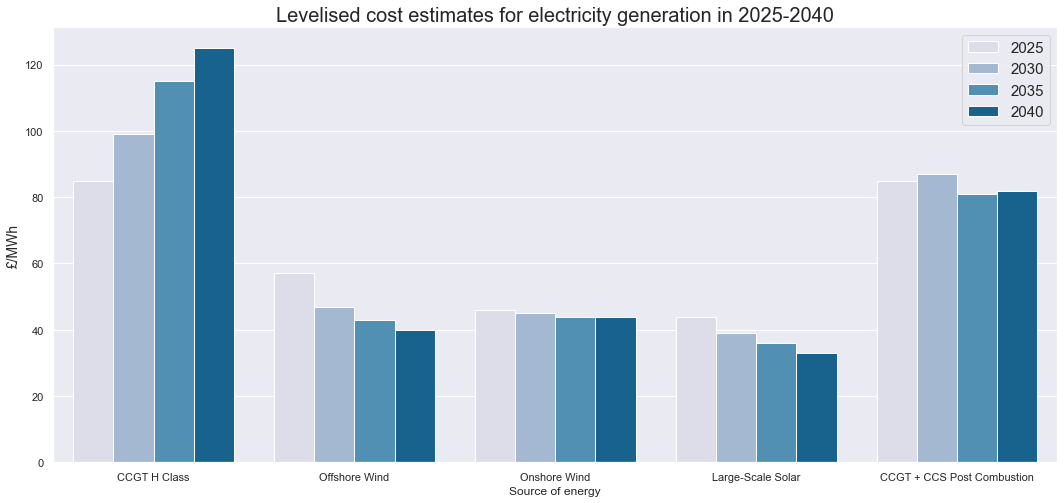

In [36]:
#Printing the data

plt.figure(figsize=(18,8))
ax = sns.barplot(x='source', y='cost', data=level, hue="year", palette='PuBu')
plt.xlabel('Source of energy')
plt.ylabel('£/MWh', fontsize=14)
plt.title('Levelised cost estimates for electricity generation in 2025-2040', fontsize=20)
plt.legend(loc='upper right', prop={'size':15})
plt.show()

We can see that in 2025, the best source of energy in terms of cost efficiency is Solar and Onshore Wind.

But that is estimated to change where Solar energy will become the most cost efficient source of energy by 2040. Offshore wind being 2nd and Onshore wind is 3rd best.

CCGT stands for combined cycle gas turbine. CCGT H class is a particular model of CCGT whose costs is estimated to increase dramatically by 2040.

CCS stands for Carbon capture and storage is a process where CO2 emitted from large stationary emission sources such as fossil fuel power plants or oil refineries, is captured and stored geologically in the underground. This increases the efficiency. The cost effeciency of CCGT + CCS does not change very significantly from 2025 to 2040.

## Total cost for additional energy generation for electric vehicles per energy source

In [37]:
# Taking the necessary years

elec1 = elec[elec['year'].isin([2025, 2030,2035,2040])]

elec1 = elec1.drop(['total_mileage'],axis=1)

#Converting to MWh

elec1['electric_mileage'] = elec1['electric_mileage']  * 314 / 10**3 * 1000000

elec1

,year,electric_mileage
10,2025,6.465638e+06
15,2030,2.091417e+07
20,2035,4.456361e+07
25,2040,6.670006e+07


In [38]:
#Calculating total cost for electric vehicles per energy source

level1 = level.merge(elec1,how='left')

#Converting to millions

level1['total_electric_cost'] = level1['cost'] * level1 ['electric_mileage'] / 10**6

level1

,year,source,cost,electric_mileage,total_electric_cost
0,2025,CCGT H Class,85,6.465638e+06,549.579204
1,2025,Offshore Wind,57,6.465638e+06,368.541349
2,2025,Onshore Wind,46,6.465638e+06,297.419334
3,2025,Large-Scale Solar,44,6.465638e+06,284.488059
4,2025,CCGT + CCS Post Combustion,85,6.465638e+06,549.579204
5,2030,CCGT H Class,99,2.091417e+07,2070.502884
6,2030,Offshore Wind,47,2.091417e+07,982.966016
7,2030,Onshore Wind,45,2.091417e+07,941.137675
8,2030,Large-Scale Solar,39,2.091417e+07,815.652651
9,2030,CCGT + CCS Post Combustion,87,2.091417e+07,1819.532837


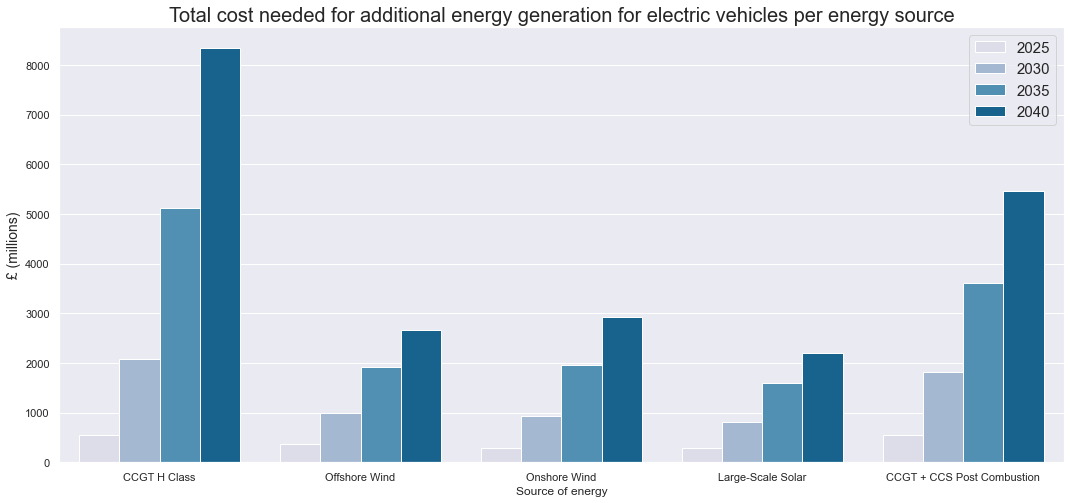

In [39]:
#Printing the data

plt.figure(figsize=(18,8))
ax = sns.barplot(x='source', y='total_electric_cost', data=level1, hue="year", palette='PuBu')
plt.xlabel('Source of energy')
plt.ylabel('£ (millions)', fontsize=14)
plt.title('Total cost needed for additional energy generation for electric vehicles per energy source', fontsize=20)
plt.legend(loc='upper right', prop={'size':15})
plt.show()

We can see that if we use purely Solar energy, we can get the additional energy we need at only 2000 million pounds for 2040 whereas CCGT H class would cost us around 9000 million pounds.

But we need to consider that for Solar energy, there needs to be good constant supply of sunshine, which the UK does not have consistently. UK have relatively lower sunshine and during certain months daylight is much shorter. So even though we can definitely use solar energy, we cannot solely rely on it.

Offshore wind is better than Onshore wind at generating electricity. Combined with the fact that the cost efficiency of Offshore wind has gotten significantly cheaper, to be close to solar energy.Also, UK has considerable amount of offshore winds, offshore winds should be the main source of energy by 2040 for the additional energy we need for electric vehicles.

Onshore wind should be secondary as even though offshore wind is better, onshore wind should not go unutilized.

We should steer away from CCGT H class as much as possible because the cost efficiency is too low besides the threat to global warming. Meanwhile, CCGT + CCS post combustion should also be reduced but no need to completely eliminate it as it more efficient than standard CCGT.

Considering all this, i propose the following ratio for the additional energy needed for electric vehicles by 2050:

**35% Offshore Wind**

**20% Onshore Wind**

**20% Large-Scale Solar**

**15% CCGT + CCS**

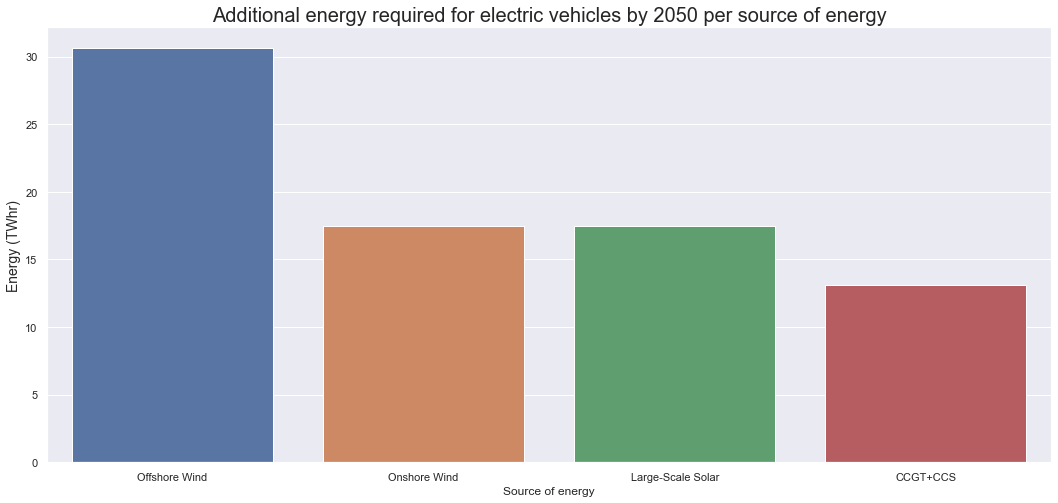

In [40]:
# Energy required for electric vehicles in 2050 is 87.5 TWhr

d = {'Source' : ['Offshore Wind','Onshore Wind','Large-Scale Solar','CCGT+CCS'], 'Energy' : [0.35*87.5,0.2*87.5,0.2*87.5,0.15*87.5]}

ratio = pd.DataFrame(data=d)

ratio

#Printing the data

plt.figure(figsize=(18,8))
ax = sns.barplot(x='Source', y='Energy', data=ratio,)
plt.xlabel('Source of energy')
plt.ylabel('Energy (TWhr)', fontsize=14)
plt.title('Additional energy required for electric vehicles by 2050 per source of energy', fontsize=20)
plt.show()